This is Data Profiling

In [ ]:
import pandas as pd
import numpy as np
import io
import pandas_profiling
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')
retail_raw.head()

order_id  order_date  customer_id  ...    brand quantity item_price
0   1703458  17/10/2019        14004  ...  BRAND_J     10.0   740000.0
1   1706815  24/10/2019        17220  ...  BRAND_R      2.0   604000.0
2   1710718  03/11/2019        16518  ...  BRAND_C      8.0  1045000.0
3   1683592  19/08/2019        16364  ...  BRAND_A      4.0   205000.0
4   1702573  16/10/2019        15696  ...  BRAND_R      2.0        NaN

[5 rows x 9 columns]

In [ ]:
print(retail_raw.dtypes)

order_id         int64
order_date      object
customer_id      int64
city            object
province        object
product_id      object
brand           object
quantity       float64
item_price     float64
dtype: object


In [ ]:
length_city = len(retail_raw['city'])
length_product_id = len(retail_raw['product_id'])
print('Length kolom city:', length_city)
print('Length kolom product_id:', length_product_id)

Length kolom city: 5000
Length kolom product_id: 5000


In [ ]:
count_city = retail_raw['city'].count()
print('Count kolom city:', count_city)

count_product_id = retail_raw['product_id'].count()
print('Count kolom product_id:', count_product_id)

Count kolom city: 4984
Count kolom product_id: 4989


In [ ]:
number_of_missing_values_city = length_city - count_city
float_of_missing_values_city = float(number_of_missing_values_city/length_city)
pct_of_missing_values_city = '{0:.1f}%'.format(float_of_missing_values_city * 100)
print('Persentase missing value kolom city:', pct_of_missing_values_city)

number_of_missing_values_product_id = length_product_id - count_product_id
float_of_missing_values_product_id = float(number_of_missing_values_product_id/length_product_id)
pct_of_missing_values_product_id = '{0:.1f}%'.format(float_of_missing_values_product_id * 100)
print('Persentase missing value kolom product_id:', pct_of_missing_values_product_id)

Persentase missing value kolom city: 0.3%
Persentase missing value kolom product_id: 0.2%


In [ ]:
print('Kolom quantity')
print('Minimum value: ', retail_raw['quantity'].min())
print('Maximum value: ', retail_raw['quantity'].max())
print('Mean value: ', retail_raw['quantity'].mean())
print('Mode value: ', retail_raw['quantity'].mode())
print('Median value: ', retail_raw['quantity'].median())
print('Standard Deviation value: ', retail_raw['quantity'].std())

print('\nKolom item_price')
print('Minimum value: ', retail_raw['item_price'].min())
print('Maximum value: ', retail_raw['item_price'].max())
print('Mean value: ', retail_raw['item_price'].mean())
print('Median value: ', retail_raw['item_price'].median())
print('Standard Deviation value: ', retail_raw['item_price'].std())

Kolom quantity
Minimum value:  1.0
Maximum value:  720.0
Mean value:  11.423987164059366
Mode value:  0    1.0
dtype: float64
Median value:  5.0
Standard Deviation value:  29.442025010811317

Kolom item_price
Minimum value:  26000.0
Maximum value:  29762000.0
Mean value:  933742.7311008623
Median value:  604000.0
Standard Deviation value:  1030829.8104242863


In [ ]:
print('Kolom quantity:\n', retail_raw['quantity'].quantile([.25, .5, .75]))
print('\nKolom item_price:\n', retail_raw['item_price'].quantile([.25, .5, .75]))

Kolom quantity:
 0.25     2.0
0.50     5.0
0.75    12.0
Name: quantity, dtype: float64

Kolom item_price:
 0.25     450000.0
0.50     604000.0
0.75    1045000.0
Name: item_price, dtype: float64


In [ ]:
print('Korelasi quantity dengan item_price')
print(retail_raw[['quantity', 'item_price']].corr())

Korelasi quantity dengan item_price
            quantity  item_price
quantity    1.000000   -0.133936
item_price -0.133936    1.000000


In [ ]:
pandas_profiling.ProfileReport(retail_raw)

This is Data Cleansing

In [ ]:
import pandas as pd
import numpy as np
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

In [ ]:
missing_values = retail_raw.isnull().any()
print('Check kolom yang memiliki missing data:', missing_values)
filling_values = retail_raw['quantity'].fillna(retail_raw.quantity.mean())
print('\nFilling the missing value (imputasi):', filling_values)
dropping_columns = retail_raw['quantity'].dropna()
print('\nDrop missing value:', dropping_columns)

Check kolom yang memiliki missing data: order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool

Filling the missing value (imputasi): 0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64

Drop missing value: 0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 4986, dtype: float64


In [ ]:
print(retail_raw['item_price'].fillna(retail_raw['item_price'].mean()))

0       7.400000e+05
1       6.040000e+05
2       1.045000e+06
3       2.050000e+05
4       9.337427e+05
            ...     
4995    4.500000e+05
4996    1.465000e+06
4997    7.470000e+05
4998    6.950000e+05
4999    1.045000e+06
Name: item_price, Length: 5000, dtype: float64


In [ ]:
Q1 = retail_raw['item_price'].quantile(0.25)
Q3 = retail_raw['item_price'].quantile(0.75)
IQR = Q3 - Q1
print('Shape awal: ', retail_raw.shape)
retail_raw = retail_raw[~((retail_raw['item_price'] < (Q1-1.5*IQR)) | (retail_raw['item_price'] > (Q3+1.5*IQR)))]
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (4225, 9)
Shape akhir:  (4225, 9)


In [ ]:
print('Shape awal: ', retail_raw.shape)
retail_raw.drop_duplicates(inplace=True)
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (4225, 9)
Shape akhir:  (4219, 9)


In [ ]:
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')
print('Lima data teratas:') 
print(uncleaned_raw.head())

print('\nKolom dengan missing value:') 
print(uncleaned_raw.isnull().any())

length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()
number_of_missing_values_qty = length_qty - count_qty
float_of_missing_values_qty = float(number_of_missing_values_qty/length_qty) 
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty*100) 
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

Lima data teratas:
   InvoiceNo                          Description  ...  CustomerID      City
0     536365   WHITE HANGING HEART T-LIGHT HOLDER  ...       17850  Surabaya
1     536366                  WHITE METAL LANTERN  ...       17850  Surabaya
2     536367       CREAM CUPID HEARTS COAT HANGER  ...       17850  Surabaya
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE  ...       17850   Jakarta
4     536369       RED WOOLLY HOTTIE WHITE HEART.  ...       17850     Medan

[5 rows x 7 columns]

Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool
Persentase missing value kolom Quantity: 4.0%


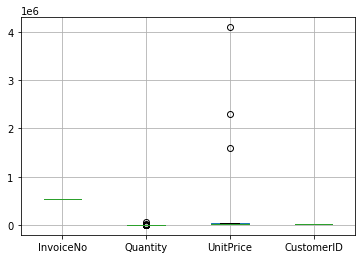

In [ ]:
import matplotlib.pyplot as plt

uncleaned_raw.boxplot()
plt.show()

In [ ]:
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1-1.5*IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3+1.5*IQR)))]
print(uncleaned_raw.duplicated(subset=None))
uncleaned_raw = uncleaned_raw.drop_duplicates()

0    False
dtype: bool
